In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('mymoviedb.csv', lineterminator='\n')

In [5]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [10]:
#there are 9827 rows and 9 columns
# No NaNs nor duplicate values
# Release data column needs to be fixed with proper data time format 
# Overview, Original Language and the poster are not of any use so we'll remove them
# Noticcale outliers in the Popularity Column
# Vote average has to be categorized for the better analysis.
# Genres has the commas and the white spaces which may be needed to be fixed in the future.

In [12]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

print(df['Release_Date'].dtypes)

datetime64[ns]


In [13]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [14]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [15]:
#Now we have successfully changed the data time with specifically showing the years

Now Categorizing the movies on the basis of the Vote_Average such as :- popular, average, below average, not_popular with the help of the "categorize_col()" function

In [36]:
cols = ['Overview', 'Original_Language', 'Poster_Url']

df.drop(cols, axis = 1, inplace = True)
df.columns

In [38]:
df.head()

,Release_Date,Title,Popularity,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,5083.954,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,3827.658,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,2618.087,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,2402.201,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,1895.511,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


Removing the Nan values

In [39]:
df.dropna(inplace = True)

In [40]:
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Genre           0
Poster_Url      0
dtype: int64

We'd split genres into the lists and then explode our dataframe to have to have only one genre per row

In [41]:
df['Genre'] = df['Genre'].str.split(', ')

df = df.explode('Genre').reset_index(drop = True)
df.head()

,Release_Date,Title,Popularity,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,5083.954,Action,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2021,Spider-Man: No Way Home,5083.954,Adventure,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
2,2021,Spider-Man: No Way Home,5083.954,Science Fiction,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
3,2022,The Batman,3827.658,Crime,https://image.tmdb.org/t/p/original/74xTEgt7R3...
4,2022,The Batman,3827.658,Mystery,https://image.tmdb.org/t/p/original/74xTEgt7R3...


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Release_Date  25793 non-null  int32  
 1   Title         25793 non-null  object 
 2   Popularity    25793 non-null  float64
 3   Genre         25793 non-null  object 
 4   Poster_Url    25793 non-null  object 
dtypes: float64(1), int32(1), object(3)
memory usage: 906.9+ KB


In [43]:
# Casting the columns into the categories

df['Genre'] = df['Genre'].astype('category')

df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [44]:
# for the displaying the unique data

df.nunique()

Release_Date     102
Title           9513
Popularity      8160
Genre             19
Poster_Url      9827
dtype: int64

#Data Visualization

In [45]:
sns.set_style('whitegrid')

#What is the most frequent genre movies in the nextflix?

In [47]:
df['Genre'].describe()

count     25793
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

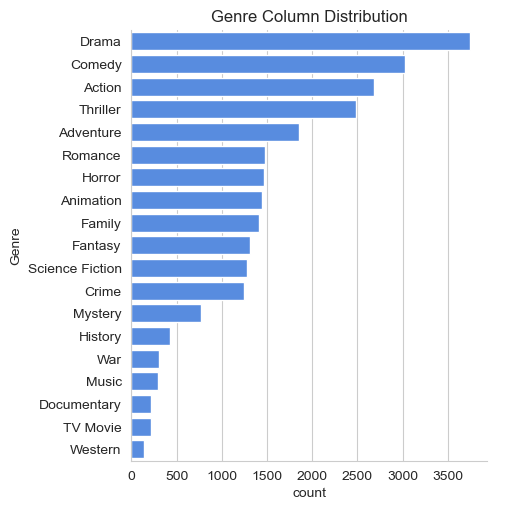

In [48]:
sns.catplot(y = 'Genre', 
            data = df, 
            kind = 'count',
            order = df['Genre'].value_counts().index,
            color = '#4287f5')
plt.title("Genre Column Distribution")
plt.show()

Show the movies with the highest popularity and their corresponding genre ?

In [57]:
df[df['Popularity'] == df['Popularity'].max() ]

,Release_Date,Title,Popularity,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,5083.954,Action,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2021,Spider-Man: No Way Home,5083.954,Adventure,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
2,2021,Spider-Man: No Way Home,5083.954,Science Fiction,https://image.tmdb.org/t/p/original/1g0dhYtq4i...


Show the movies with the Lowest popularity and their corresponding genre ?

In [58]:
df[df['Popularity'] == df['Popularity'].min() ]

,Release_Date,Title,Popularity,Genre,Poster_Url
25787,2021,The United States vs. Billie Holiday,13.354,Music,https://image.tmdb.org/t/p/original/vEzkxuE2sJ...
25788,2021,The United States vs. Billie Holiday,13.354,Drama,https://image.tmdb.org/t/p/original/vEzkxuE2sJ...
25789,2021,The United States vs. Billie Holiday,13.354,History,https://image.tmdb.org/t/p/original/vEzkxuE2sJ...
25790,1984,Threads,13.354,War,https://image.tmdb.org/t/p/original/lBhU4U9Eeh...
25791,1984,Threads,13.354,Drama,https://image.tmdb.org/t/p/original/lBhU4U9Eeh...
25792,1984,Threads,13.354,Science Fiction,https://image.tmdb.org/t/p/original/lBhU4U9Eeh...


In which year most of the movies were filmed ?

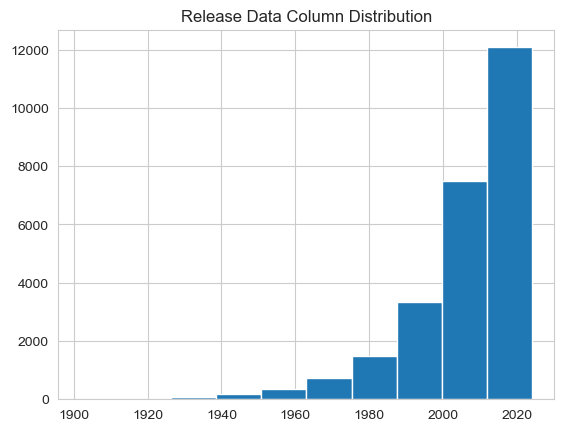

In [61]:
# For the visualization we'll use a histogram

df['Release_Date'].hist()
plt.title('Release Data Column Distribution')
plt.show()

Conclusion (Summary)

Q1) what is the most frequent Genre in the dataset ?
Drama Genre which has appeared more than 14% of the times amongst the others.

Q2) Show the movies with the highest popularity and their corresponding genre ?
"Spider-Man No Way Home" is the movies with the highest popularity with the genres :- Action, Adventure, Science Fiction

Q3)Show the movies with the highest popularity and their corresponding genre ?
"The United States" and "Thread" is the movies with the highest popularity with the genres :- Music, Drama, War, Science-Fiction.

Q4) In which year most of the movies were filmed ?
Year 2020 has the highest filming rate in our dataset.